## Лабораторна робота 6. **Unsupervised Learning**

Оцінювання даної роботи буде ураховувати якість Ваших висновків та візуалізацій. При наявності ЛИШЕ коду та візуалізацій без роз'яснень, робота оцінюватися НЕ БУДЕ.  

Більшість поставлених в цій лабораторній роботі задач в майбутньому буде ставитись Вами самойстійно!

Під час виконання Вам дозволено користуватися будь-якими зручними для вас бібліотеками для візуалізації. 

Оформлення коментарів повинно проводитися в текстових комірках ноутбука з використанням синтаксису [LaTeX](https://en.wikibooks.org/wiki/LaTeX/Basics) для оформлення тексту та формул. 

Роботи ідентифіковані як ІДЕНТИЧНІ одразу отримують 0 балів.

## Кластерування  

В цій лабораторній роботі Ви будете вирішувати задачу класифікації БЕЗ вчителя. 

In [2]:
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering 
from scipy.cluster import hierarchy 
from scipy.spatial import distance_matrix 

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
%matplotlib inline 

import os
import warnings


warnings.filterwarnings('ignore')

**Завдання 0** 

Для початку необхідно завантажити вибірку `Mall_Customers` і перейменувати атрибути `Annual Income (k$)` в `Income`,`Spending Score (1-100)` в `SpendingScore`

In [3]:
customer_set = pd.read_csv("Mall_Customers.csv")

In [4]:
customer_set.rename(columns={"Annual Income (k$)": "Income", "Spending Score (1-100)": "SpendingScore"}, inplace=True)

In [5]:
customer_set.head()

,CustomerID,Gender,Age,Income,SpendingScore
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


**Завдання 1** 

Підготовка даних до опрацювання

* подивитись які атрибути містить вибірка; 
* вивести розмірність датасету;
* вивести основну статистичну інформацію по числовим змінним;  
* перевірити на наявність `NaN`.   

In [6]:
customer_set.columns.tolist()

['CustomerID', 'Gender', 'Age', 'Income', 'SpendingScore']

In [7]:
customer_set.shape

(200, 5)

In [8]:
customer_set.describe()

,CustomerID,Age,Income,SpendingScore
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [9]:
customer_set.isnull().sum()

CustomerID       0
Gender           0
Age              0
Income           0
SpendingScore    0
dtype: int64

## EDA Mall Customers

**Завдання 2** 

Як Ви могли помітити по статистичній аналітиці вибірки вона містить змінну `CustomerID`. Ця змінна не впливає на аналіз даних тому її можна видалити.

In [10]:
customer_set.drop(columns=["CustomerID"], inplace=True)

In [11]:
customer_set.head()

,Gender,Age,Income,SpendingScore
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


**Завдання 3** 

Побудувати діаграми розподілу по змінним `Age` , `Income` та `SpendingScore`

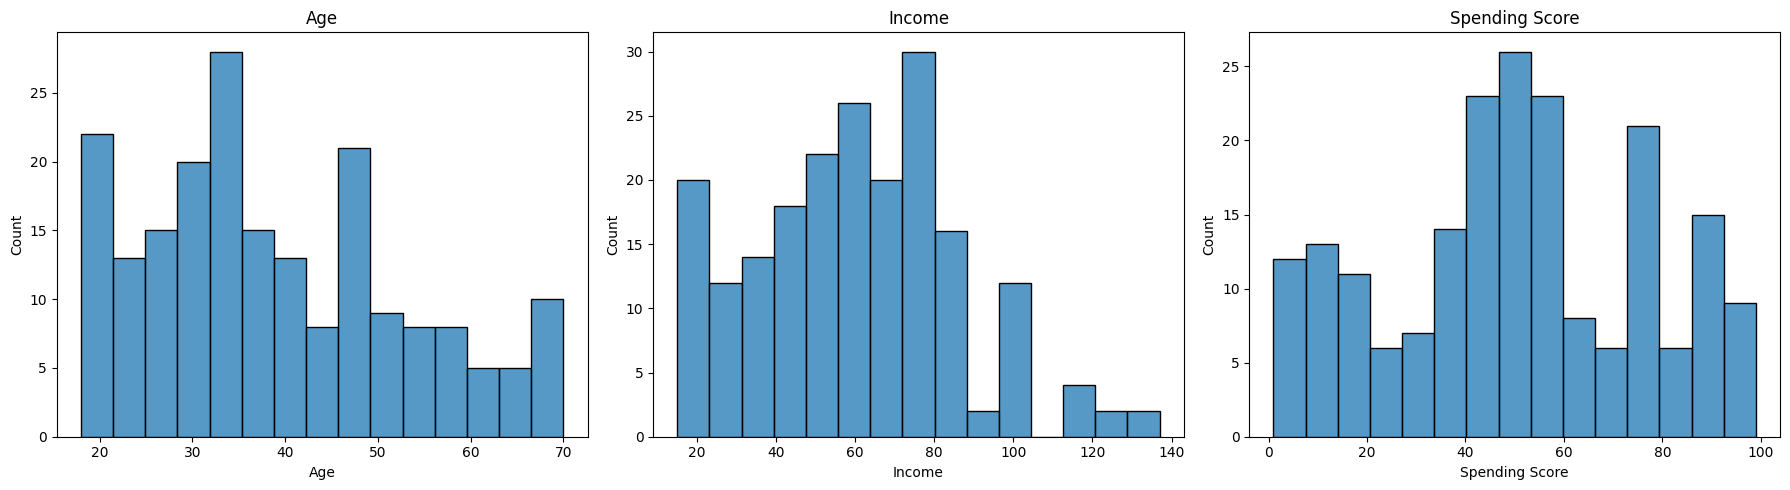

In [12]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.histplot(data=customer_set, x='Age', bins=15, kde=False, ax=axes[0])
axes[0].set_title('Age')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Count')

sns.histplot(data=customer_set, x='Income', bins=15, kde=False, ax=axes[1])
axes[1].set_title('Income')
axes[1].set_xlabel('Income')
axes[1].set_ylabel('Count')

sns.histplot(data=customer_set, x='SpendingScore', bins=15, kde=False, ax=axes[2])
axes[2].set_title('Spending Score')
axes[2].set_xlabel('Spending Score')
axes[2].set_ylabel('Count')

plt.tight_layout()
plt.show()


**Завдання 4** 

Давайте подивимось на ці змінні `Age` , `Income` та `SpendingScore` відносно змінної `Gender`. 
* Побудуємо `pairplot` по всім змінним відностно змінної `Gender`:  
 
* Побудуємо `pairplot` використовуючи `sns.PairGrid` із заданими `(scatterplot)`, `(kdeplot)` та `(kdeplot, lw=1)` по відповідно правому верхньому куту, діагоналі і лівому нижньому кутут відносно змінної `Gender`:  
 

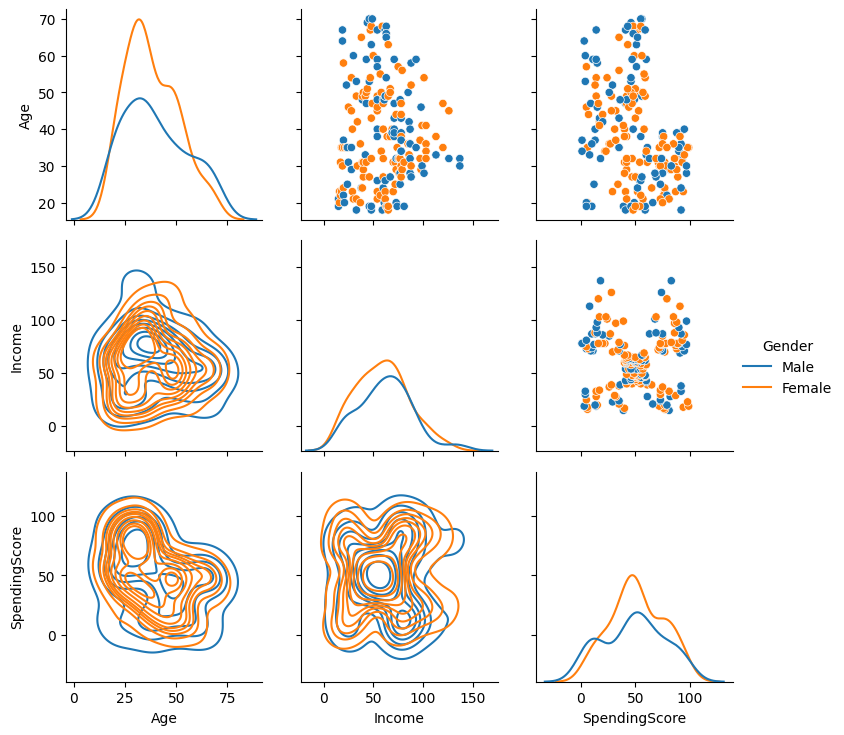

In [13]:
pair_gender = sns.PairGrid(customer_set, vars=["Age", "Income", "SpendingScore"], hue="Gender")
pair_gender.map_upper(sns.scatterplot)
pair_gender.map_diag(sns.kdeplot)
pair_gender.map_lower(sns.kdeplot, lw=1)
pair_gender.add_legend()
plt.show()

**Висновки з 1-4 завдання (детальні)**

1.   Датасет має розмірність 200×5, без пропущених значень
2.   Змінну CustomerID було видалено так як вона лише унікальний ідентифікатор і не несе корисної інфи.
3.   Найбільше клієнтів у віці 25–40 років; 50% значень у межах 29–49 років; без аутлаєрів
4.   Найбільше клієнтів із доходом 30–90, є один аутлаєр — 140, 50% значень у межах 40–80.
5.   Spending Score є рівномірним розподілом, симетричним, аутлаєрів немає.
6.   Жінок більше, ніж чоловіків.
7.   У чоловіків і жінок схожий розподіл віку та доходу, але Spending Score у жінок вище

**Завдання 5** 

Проаналізувати змінну `Gender`:
* вивести співвідношення по статям;
* побудувати `countplot` по `Gender`;  
* побудувати `pie`по `Gender'.  

In [14]:
gender_value= customer_set["Gender"].value_counts()

In [15]:
gender_value

Gender
Female    112
Male       88
Name: count, dtype: int64

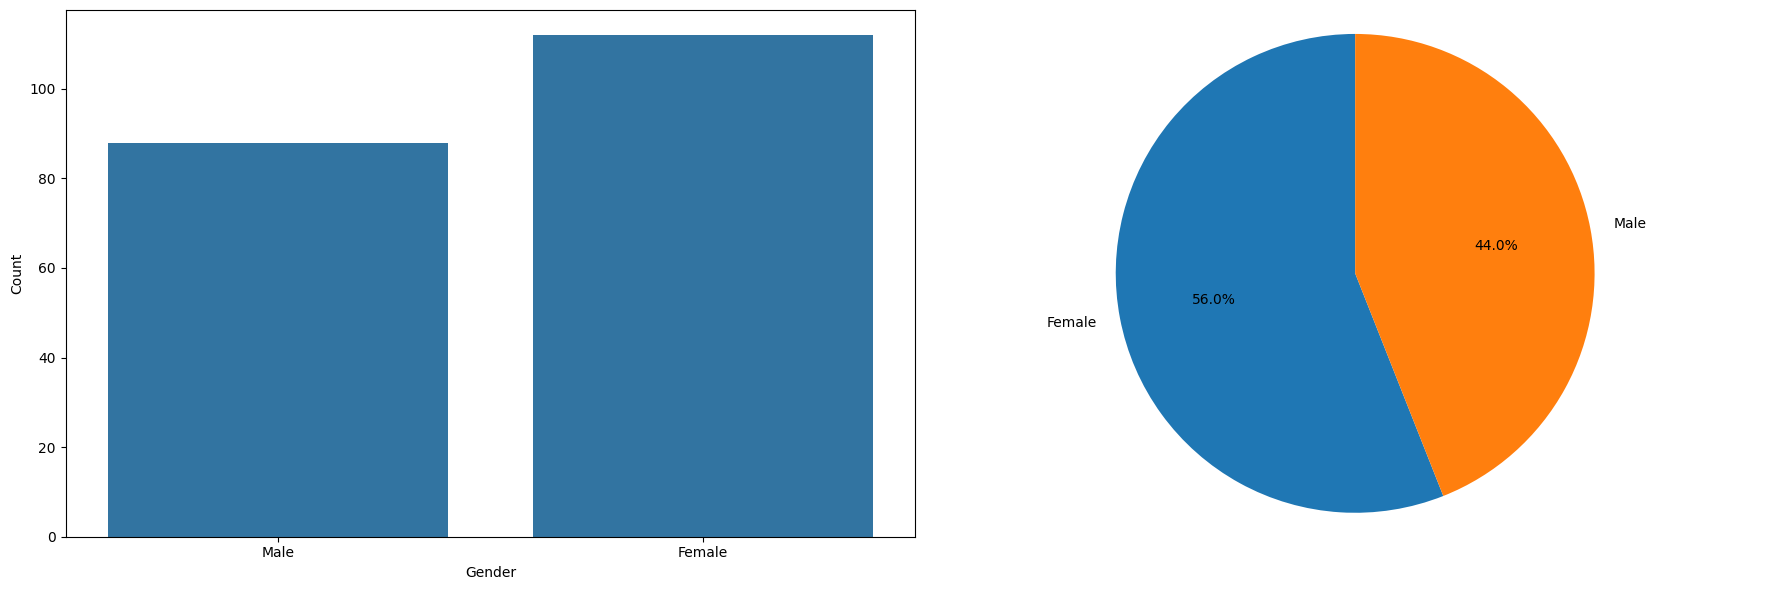

In [16]:
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

sns.countplot(data=customer_set, x='Gender', ax=axes[0])
axes[0].set_xlabel("Gender")
axes[0].set_ylabel("Count")

axes[1].pie(gender_value, labels=gender_value.index, autopct='%1.1f%%', startangle=90)
axes[1].axis('equal')

plt.tight_layout()
plt.show()

**Завдання 6** 

Побудувати гістограми [histplot](https://seaborn.pydata.org/generated/seaborn.histplot.html) змінних `Age` та `Income` відносно змінної `Gender` з різними параметрами:
*  подивитись на скільки змінюється візуалізація при різних значеннях параметра `multiple`, наприклад `dodge` та `layer`.

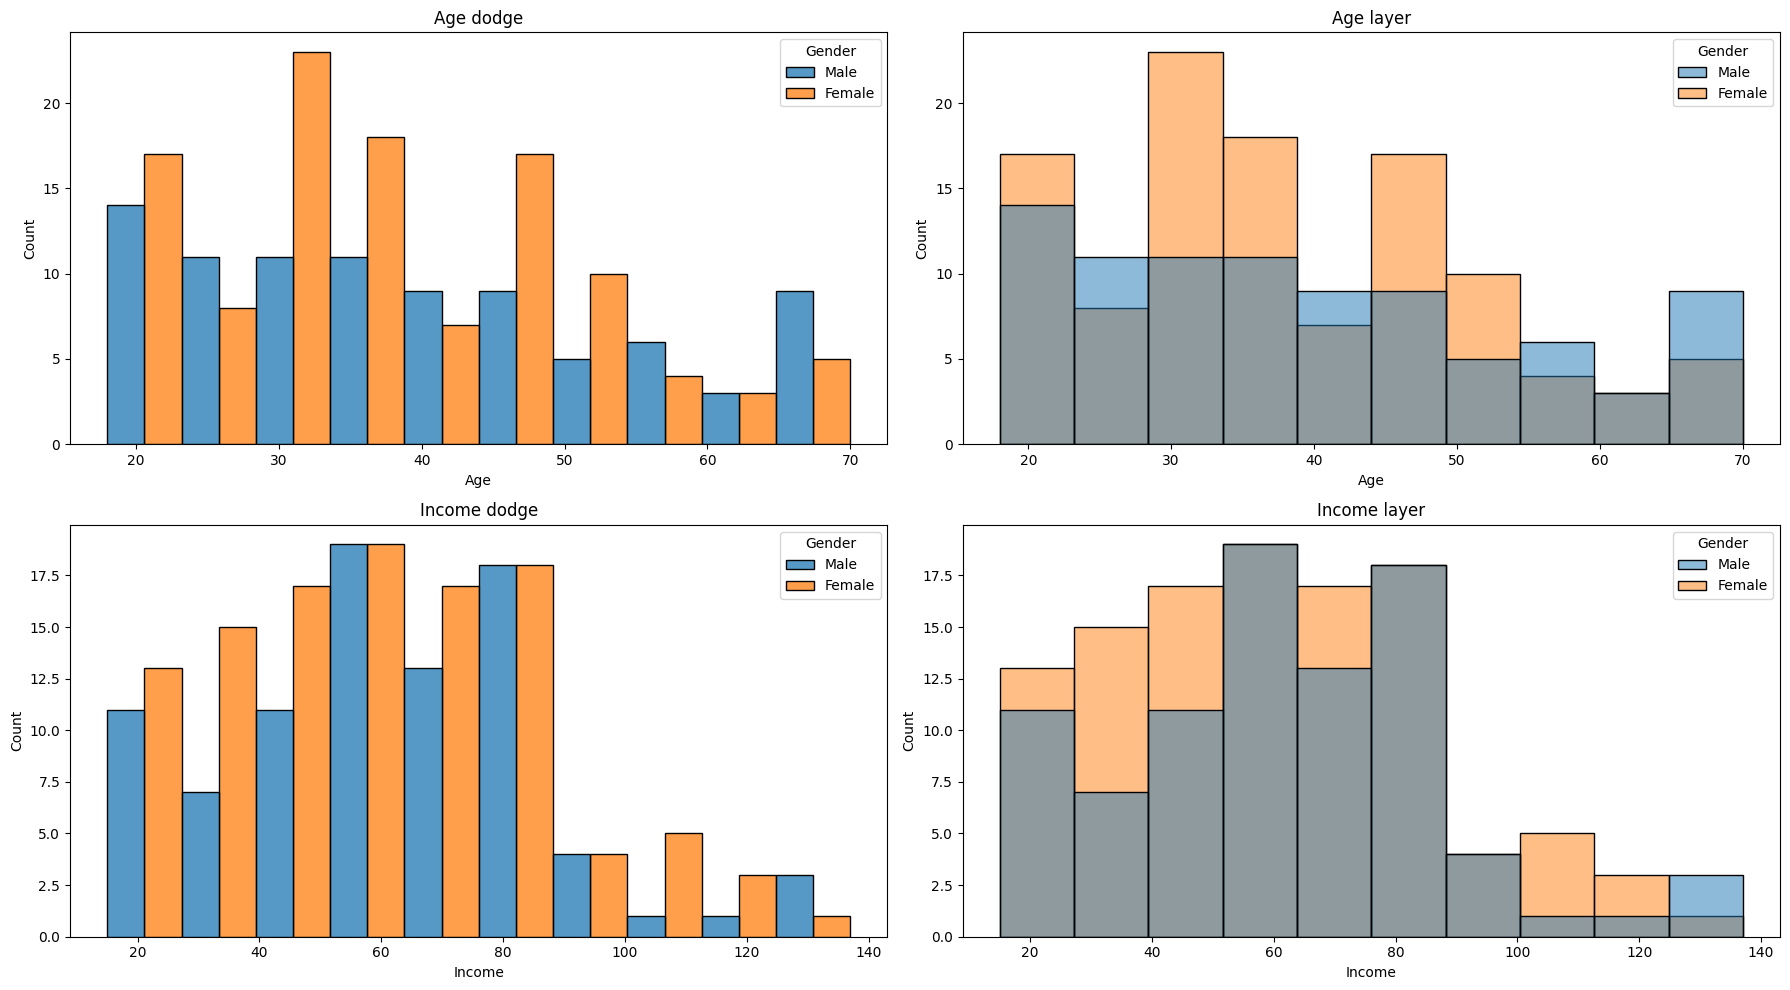

In [17]:
fig, axes = plt.subplots(2, 2, figsize=(18, 10))

sns.histplot(data=customer_set, x='Age', hue='Gender', multiple='dodge', bins=10, ax=axes[0, 0])
axes[0, 0].set_title("Age dodge")
axes[0, 0].set_xlabel("Age")
axes[0, 0].set_ylabel("Count")

sns.histplot(data=customer_set, x='Age', hue='Gender', multiple='layer', bins=10, ax=axes[0, 1])
axes[0, 1].set_title("Age layer")
axes[0, 1].set_xlabel("Age")
axes[0, 1].set_ylabel("Count")

sns.histplot(data=customer_set, x='Income', hue='Gender', multiple='dodge', bins=10, ax=axes[1, 0])
axes[1, 0].set_title("Income dodge")
axes[1, 0].set_xlabel("Income")
axes[1, 0].set_ylabel("Count")

sns.histplot(data=customer_set, x='Income', hue='Gender', multiple='layer', bins=10, ax=axes[1, 1])
axes[1, 1].set_title("Income layer")
axes[1, 1].set_xlabel("Income")
axes[1, 1].set_ylabel("Count")

plt.tight_layout()
plt.show()

**Завдання 7** 

Побудувати гістограми [histplot](https://seaborn.pydata.org/generated/seaborn.histplot.html) змінної `SpendingScore` відносно змінної `Gender` з різними параметрами:  
* подивитись на скільки змінюється візуалізація при різних значеннях параметра `multiple`, наприклад `dodge` та `layer`. 



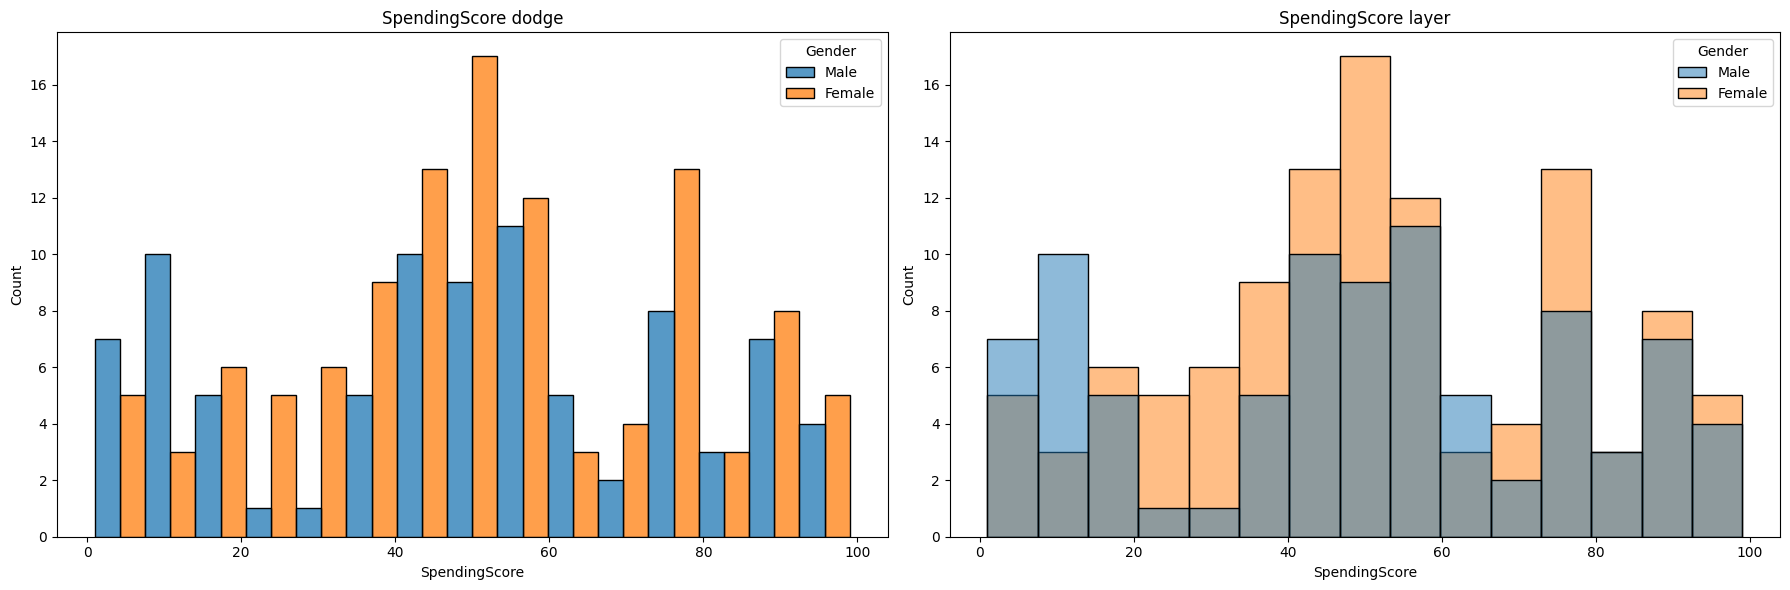

In [18]:
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

sns.histplot(data=customer_set, x='SpendingScore', hue='Gender', multiple='dodge', bins=15, ax=axes[0])
axes[0].set_title("SpendingScore dodge")
axes[0].set_xlabel("SpendingScore")
axes[0].set_ylabel("Count")

sns.histplot(data=customer_set, x='SpendingScore', hue='Gender', multiple='layer', bins=15, ax=axes[1])
axes[1].set_title("SpendingScore layer")
axes[1].set_xlabel("SpendingScore")
axes[1].set_ylabel("Count")

plt.tight_layout()
plt.show()

**Завдання 8** 

Побудувати `boxplot` по змінній `SpendingScore` і подивитись як відрізняються витрати відностно змінної `Gender`. 

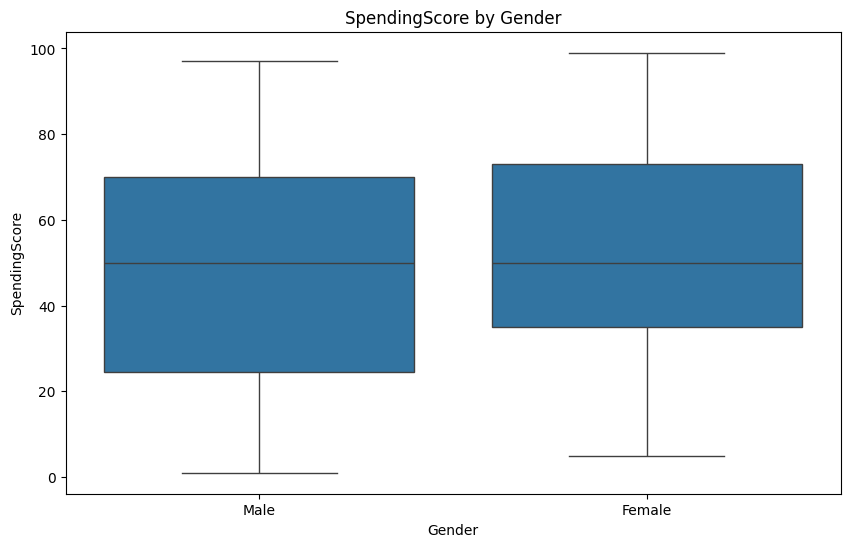

In [19]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=customer_set, x='Gender', y='SpendingScore')

plt.title("SpendingScore by Gender")
plt.xlabel("Gender")
plt.ylabel("SpendingScore")

plt.show()

**Висновки з завдання 5 - 8(детальні)**

1.   У вибірці 56% жінок (112 осіб) і 44% чоловіків (88 осіб)
2.  Жінки переважно молодші та мають середній рівень доходу. Чоловіки частіше представлені в категорії з вищим доходом.
3. Жінки в середньому витрачають більше, ніж чоловіки
4. У жінок вищий середній Spending Score і більший розкид значень.
5. У чоловіків витрати зосереджені у вузькому діапазоні. У чоловіків витрати менш варіативні, з меншою кількістю аутлаєрів.

## K-means Method ##

**Завдання 9** 

Як Ви могли помітити, вибірка, з якою ми працюємо, не містить ключової зміної з вірними мітками. Тому перед початком кластерування необхідно визначити (підібрати) оптимальну кількість кластерів на яке буде проведено розбиття. Для цього необхідно:
1. видалити змінну `Gender`, тому що ... **Чому?**;  
2. задати мінімальну та максимальну кількість кластерів самостійно;  
3. На прикладі алгоритму [KMeans](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html), для ознайомлення з тим як працювати в умовах коли кількість кластерів невідома заздалегіть і немає вірних міток з позначками до якого кластеру відноситься спостереження пропонується використати метод [Elbow](https://coderoad.ru/19197715/Scikit-Learn-K-Means-Elbow-criterion) (додаткові джерела: [article_1](https://medium.com/analytics-vidhya/elbow-method-of-k-means-clustering-algorithm-a0c916adc540#:~:text=K%2Dmeans%20clustering%20is%20an,cluster%20with%20the%20nearest%20centroid.), [article_2](https://www.geeksforgeeks.org/elbow-method-for-optimal-value-of-k-in-kmeans/))

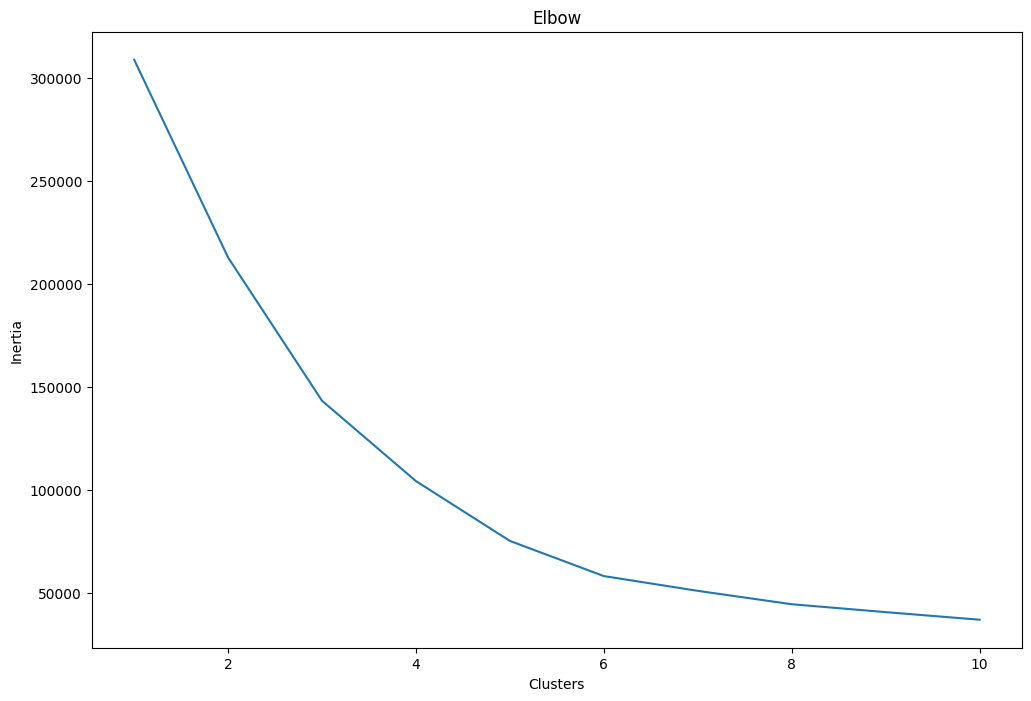

In [20]:
X = customer_set.drop(['Gender'], axis=1)
clusters = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42, n_init=10)
    kmeans.fit(X)
    clusters.append(kmeans.inertia_)
    
    
fig, ax = plt.subplots(figsize=(12, 8))
sns.lineplot(x=list(range(1, 11)), y=clusters, ax=ax)
ax.set_title('Elbow')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')

plt.show()

**Висновки з завдання 9 (детальні)** 

1.  Змінна Gender була видалена, оскільки вона є категоріальною і не містить  інформації, що напряму впливає на клієнтів. Без її кодування можна спортити  результати кластеризації.
2.   Було встановлено діапазон можливих кластерів, від 2 до 10 для того, щоб протестувати різні гіпотези  для кількості кластерів у вибірці.
3. Метод лікоть, показав, що 5 кластерів найоптимальніший варіант.

**Завдання 10** 

Зробити двовимірну візуалізацію кластеризації методу К-середніх на вибраних Вами двох різних кількостях кластерів використовуючи змінні `Income` та `SpendingScore`. 

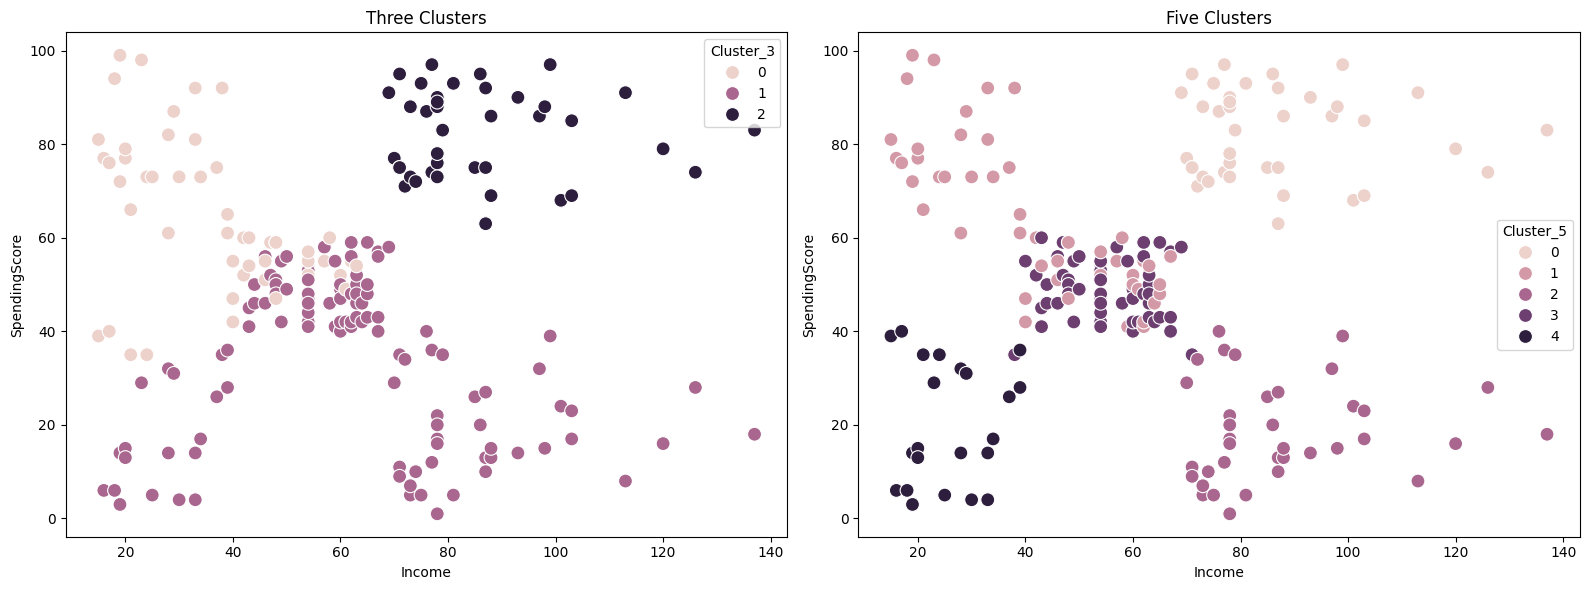

In [21]:
three_clusters = KMeans(n_clusters=3).fit_predict(X)
customer_set['Cluster_3'] = three_clusters

five_clusters = KMeans(n_clusters=5).fit_predict(X)
customer_set['Cluster_5'] = five_clusters

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

sns.scatterplot(x='Income', y='SpendingScore', hue='Cluster_3', data=customer_set, s=100, ax=axes[0])
axes[0].set_title("Three Clusters")
axes[0].set_xlabel("Income")
axes[0].set_ylabel("SpendingScore")

sns.scatterplot(x='Income', y='SpendingScore', hue='Cluster_5', data=customer_set, s=100, ax=axes[1])
axes[1].set_title("Five Clusters")
axes[1].set_xlabel("Income")
axes[1].set_ylabel("SpendingScore")

plt.tight_layout()
plt.show()

**Завдання 11** 

Зробити візуалізацію кластеризації методу К-середніх на вибраних Вами двох різних кількостях кластерів використовуючи [scatter_3d](https://plotly.com/python/3d-scatter-plots/).

In [22]:
fig_three = px.scatter_3d(data_frame=X, x='Income', y='SpendingScore', z='Age', color=three_clusters.astype(str))
fig_three.show()

fig_five = px.scatter_3d(data_frame=X, x='Income', y='SpendingScore', z='Age', color=five_clusters.astype(str))
fig_five.show()

**Висновки з завдання 10 - 11 (детальні)** 

1. Кластери мають логічну структуру, виявлені групи клієнтів відрізняються за рівнем доходу, витрат і віку. 
2. Тривимірне представлення даних показало чітке згрупування клієнтів у 5 окремих сегментів. 
3. Кластери розділені за доходом, витратами та віком, що дозволяє точно сегментувати клієнтів.
4. Варіант з 3 кластерами був неефективним, оскільки мав надто розсіяний кластер.
5. Незалежно від того, скільки кластерів обирається, обсяг даних залишається таким самим. Тому якість класифікації напряму залежить від правильного вибору кількості кластерів.

## Agglomerative clustering ##

Розглянемо ще один підхід до кластеризації - [агломеративну ієрархічну кластеризацію](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html)

**Завдання 12** 

Кластеризуйте датасет за допомогою [агломеративної ієрархічнуої кластеризації](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html)

Мінімально необхідні параметри, що треба налаштувати:  
* `n_clusters`: параметр, який відповідає за кільксіть кластерів на яку буде проведено розбиття вибірки;  
* `linkage`: параметр зв’язку. Цей параметр визначає, яку відстань використовувати між наборами спостережень.
* перевірте як працює цей метод з різними параметрами `linkage`  
* після кожної зміни параметрів - візуалізувати розбиття на кластери

Розрахувати матрицю відстаней для нашого набору даних:
* за допомогою методу [hierarchy.linkage](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html) і матриці відстаней кластеризувати дані з різними значеннями параметра `method`
* за допомогою методу [hierarchy.dendrogram](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.dendrogram.html) візуалізувати отримані результати кластеризації у вигляді дендрограм


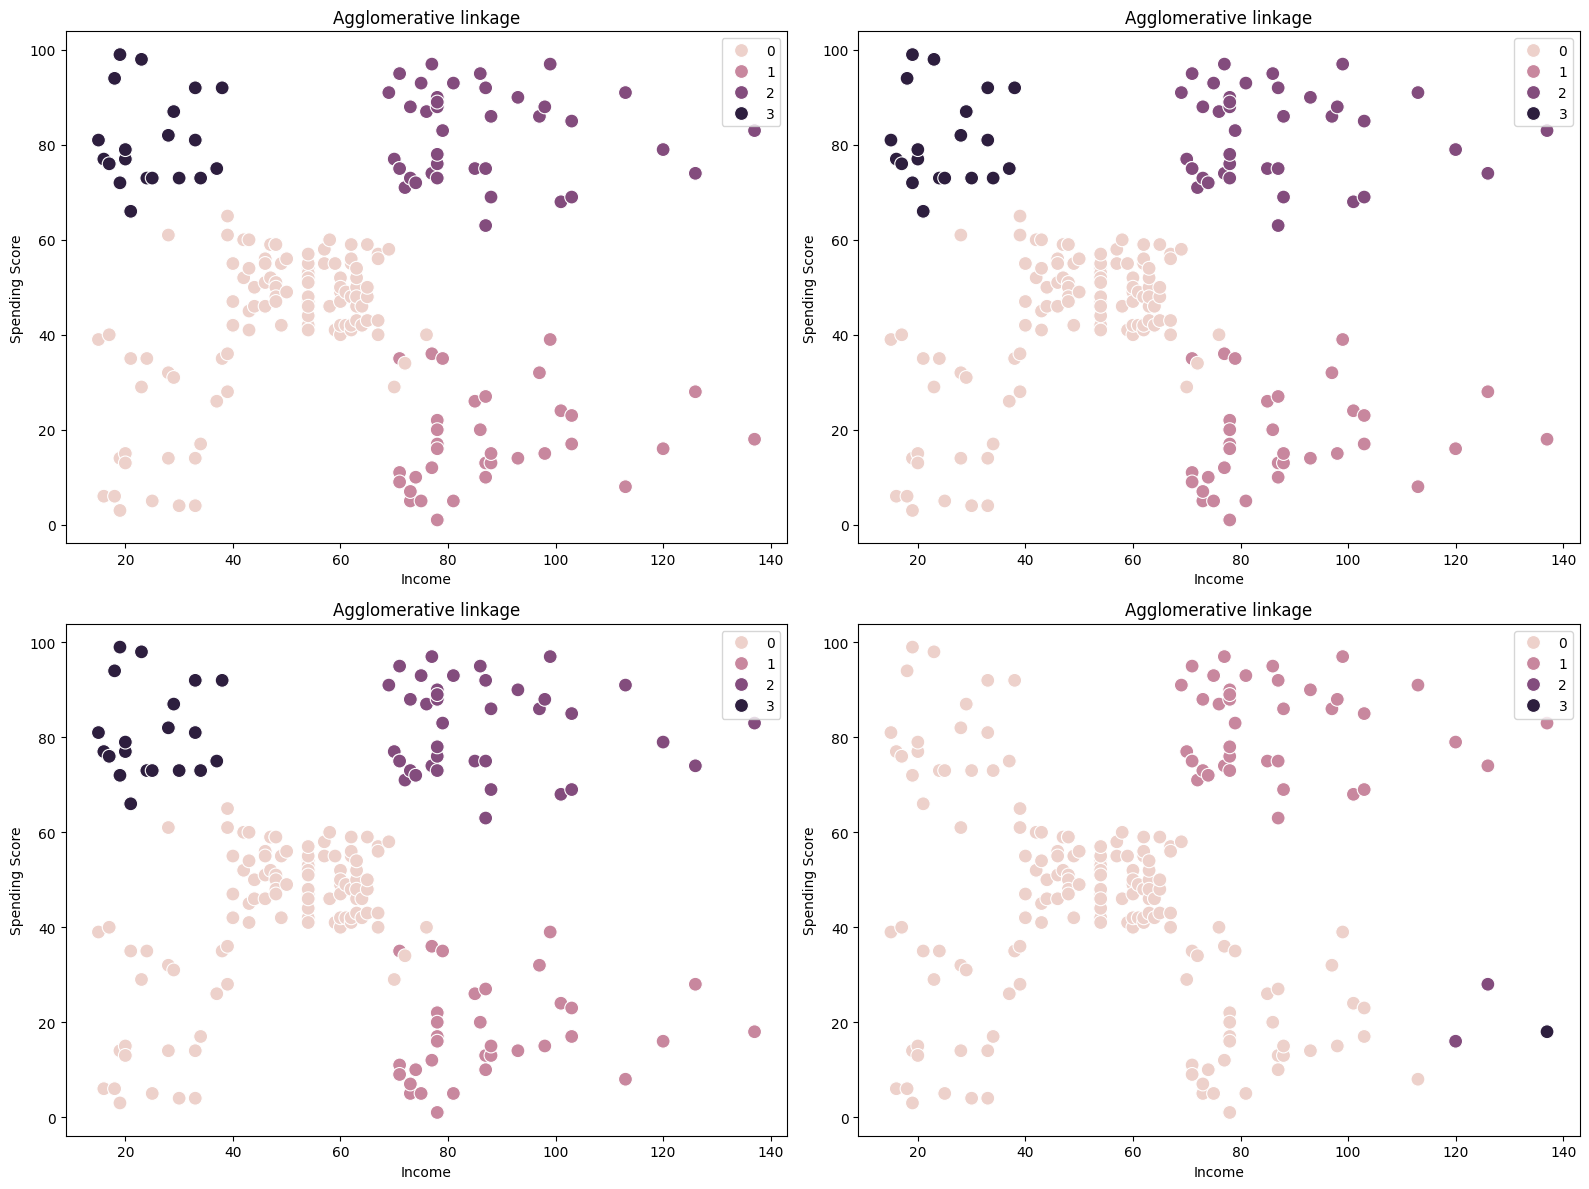

In [23]:
linkage_methods = ['ward', 'complete', 'average', 'single']

plt.figure(figsize=(16, 12))

for i, method in enumerate(linkage_methods):
    model = AgglomerativeClustering(n_clusters=4, linkage=method)
    clusters = model.fit_predict(X)
    plt.subplot(2, 2, i + 1)
    sns.scatterplot(x=X['Income'], y=X['SpendingScore'], hue=clusters, s=100)
    plt.title(f'Agglomerative linkage')
    plt.xlabel("Income")
    plt.ylabel("Spending Score")

plt.tight_layout()
plt.show()

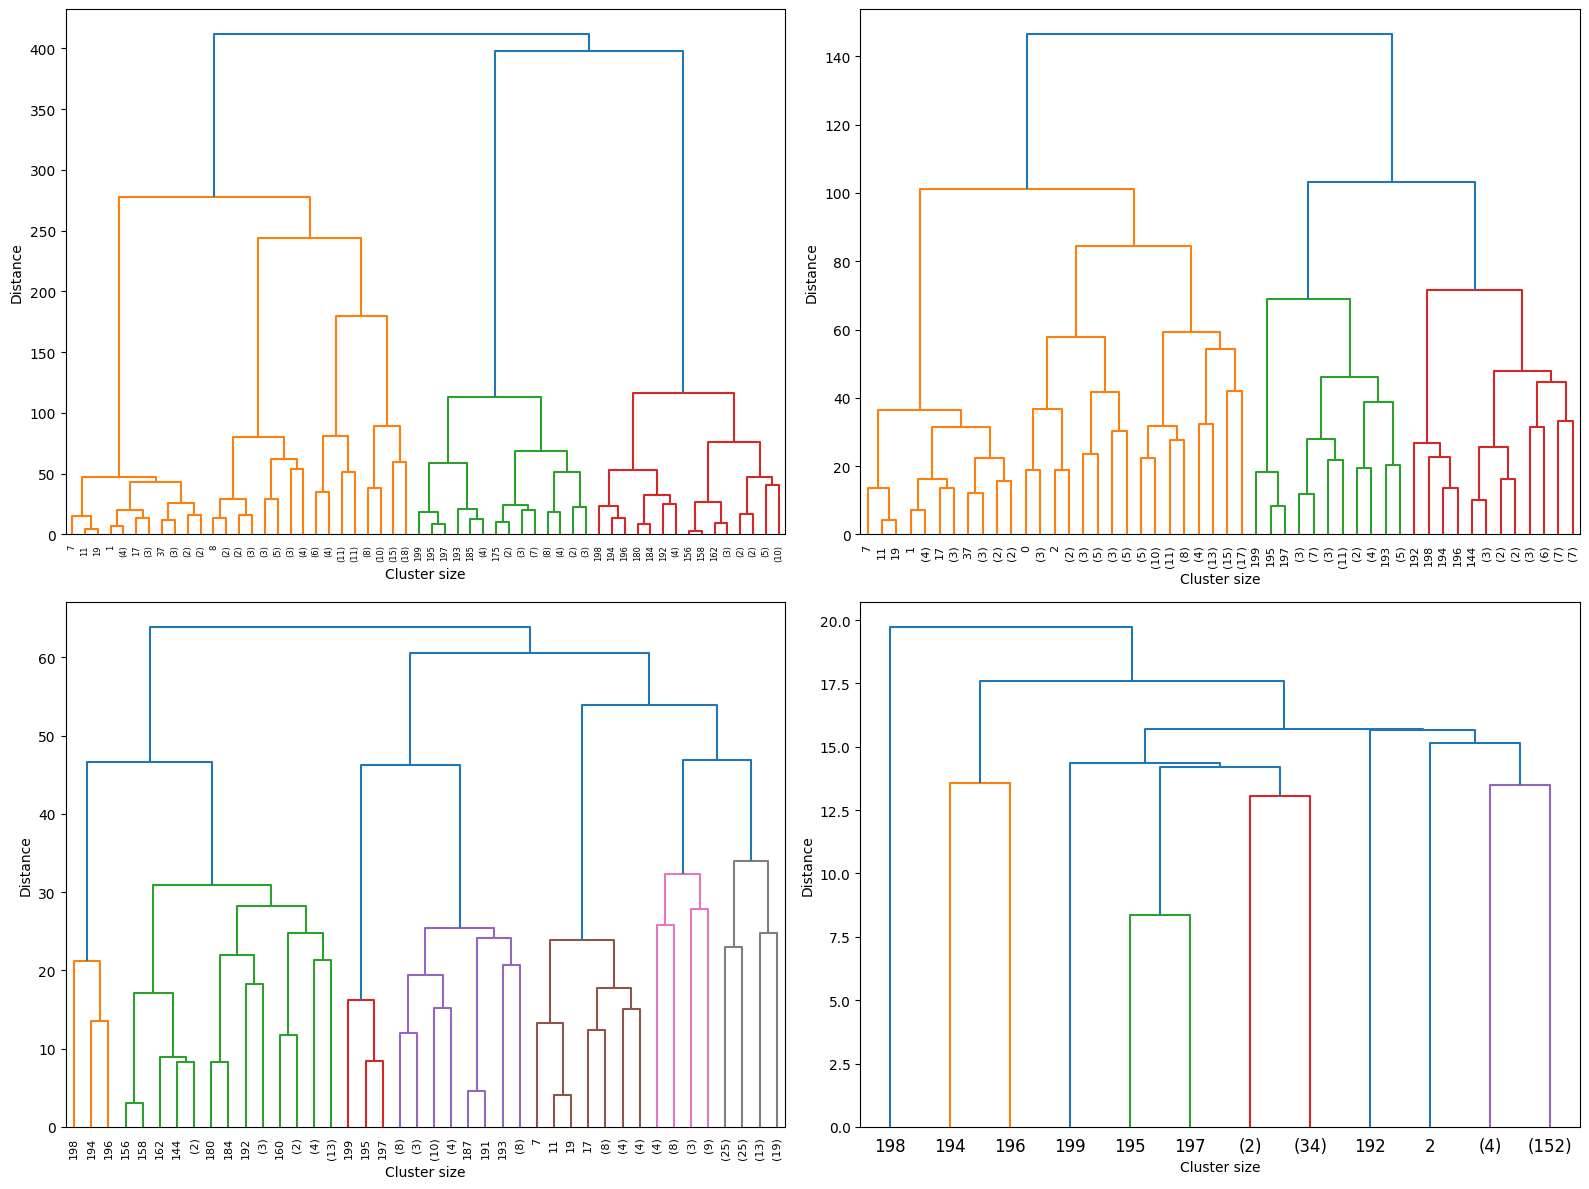

In [24]:
X_array = X.values 
methods = ['ward', 'complete', 'average', 'single']

plt.figure(figsize=(16, 12))

for i, method in enumerate(methods):
    linkage_matrix = hierarchy.linkage(X_array, method=method)
    
    plt.subplot(2, 2, i + 1)
    hierarchy.dendrogram(linkage_matrix, truncate_mode='level', p=5, color_threshold=None)
    plt.xlabel('Сluster size')
    plt.ylabel('Distance')

plt.tight_layout()
plt.show()

**Висновки з завдання 12 (детальні)**

1. Найкращий результат кластеризації було отримано за допомогою методу Ward. Він дав чіткі та симетричні кластери, що розділило точно  дані на окремі групи.
2.  Інші методи продемонстрували менш виразні або витягнуті групи.

**Завдання 13** 

А тепер зробимо порівняльний аналіз отриманих результатів кластеризації розглянутими методами:  
* В фінальних візуалізаціях треба використовувати **однакову** (на вашу думку оптимальну) кількість кластерів!!!  

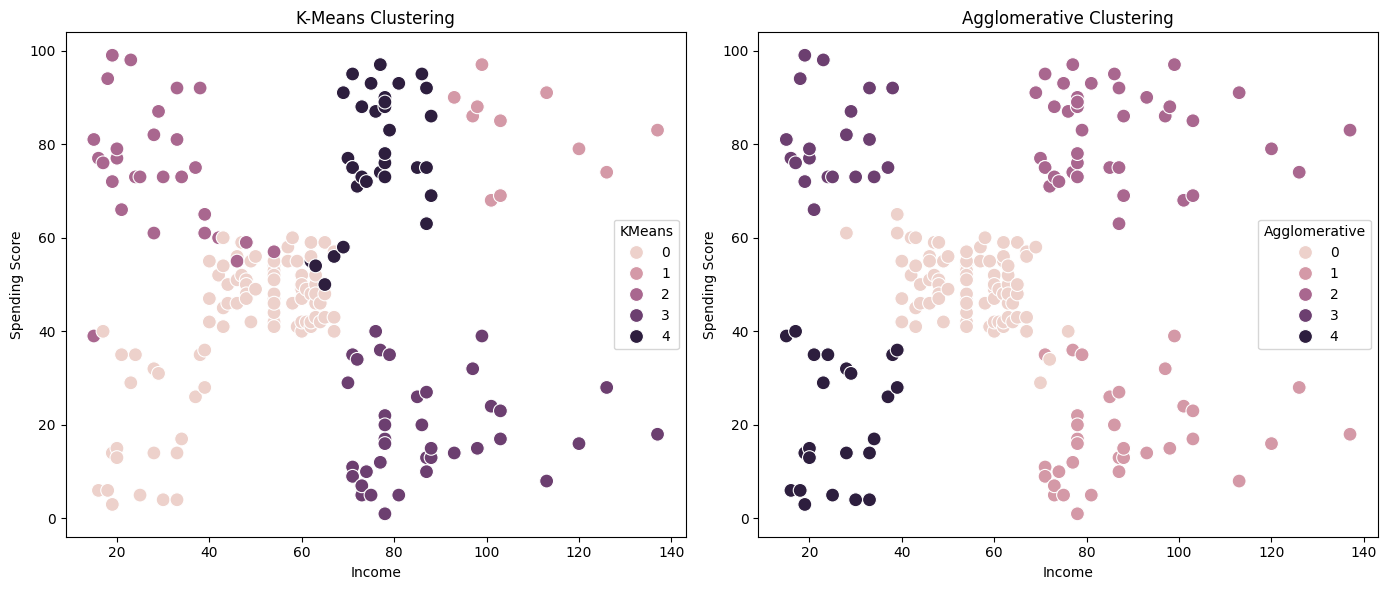

In [25]:
n_clusters = 5

kmeans = KMeans(n_clusters=n_clusters, random_state=42)
customer_set['KMeans'] = kmeans.fit_predict(X)

agglo = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
customer_set['Agglomerative'] = agglo.fit_predict(X)

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.scatterplot(data=customer_set, x='Income', y='SpendingScore', hue='KMeans', s=100, ax=axes[0])
axes[0].set_title("K-Means Clustering")
axes[0].set_xlabel("Income")
axes[0].set_ylabel("Spending Score")

sns.scatterplot(data=customer_set, x='Income', y='SpendingScore', hue='Agglomerative', s=100, ax=axes[1])
axes[1].set_title("Agglomerative Clustering")
axes[1].set_xlabel("Income")
axes[1].set_ylabel("Spending Score")

plt.tight_layout()
plt.show()

**Висновки з завдання 13 (детальні)**

1. У завданні 13 я порівняла два методи кластеризації, K-Means та агломеративну ієрархічну кластеризацію, обидва з кількістю кластерів, рівною 5.
2.  Обидва методи дали схожі результати, чітко розподіляючи групи за доходом та рівнем витрат.
3. K-Means формує більш чіткі й симетричні межі між кластерами. K-Mean більш чутливий до викидів
4. Агломеративна кластеризація краще підходить для виявлення плавних переходів між різними типами клієнтів.